# Titrations


In [9]:
import pyequion
import numpy as np
import matplotlib.pyplot as plt

In [7]:
sol = pyequion.solve_solution({'NaOH': 10, 'HCl': 10})
pyequion.print_solution(sol)

Solution Results:
	pH = 6.99254 
	sc = 1185.79816 uS/cm
	I = 10.00011 mmol/L
	DIC = nan mmol/L
Saturation Index:
	Halite: -5.65997008937817
Ionic Activity Product:
	Halite: 8.128864991535856e-05
Precipitation concentration:
	Halite: 0.0 mM


## Titration curve: Strong Acid vs Strong Base

Solution Results:
	pH = 2.03943 
	sc = 4026.03547 uS/cm
	I = 10.00000 mmol/L
	DIC = nan mmol/L
Saturation Index:
	Halite: -9.659969625631014
Ionic Activity Product:
	Halite: 8.128873671683067e-09
Precipitation concentration:
	Halite: 0.0 mM


Text(0, 0.5, 'pH')

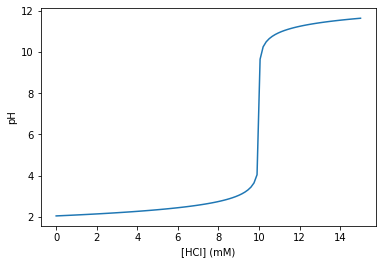

In [14]:
cHCl = 5
npt = 101
NaOH_span = np.linspace(1e-5, 15, npt)
sol_span = [pyequion.solve_solution({'NaOH': naoh, 'HCl': 10}) for naoh in NaOH_span]
pH_span = np.array([sol.pH for sol in sol_span])
plt.plot(NaOH_span, pH_span)
plt.xlabel('[HCl] (mM)')
plt.ylabel('pH')

## Titration curve: Strong Acid as analyte adding Strong Base

A becker contains HCl in a concentration of 5mM and a total volume of 500mL. Create the tritant curve for additions of NaOH with a concentration of 100mM.

The equivalent point, in which [HCl] = [NaOH], requires a addition of:

$$\Delta V_{NaOH} = \dfrac{[HCl]_0 V_0} {[NaOH]_0}$$

Text(0.5, 1.0, 'Titration of HCl with NaOH')

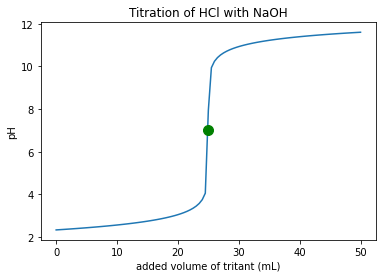

In [38]:
cNaOH_0 = 100 #mM of solution to be added
cHCl_0 = 5 #mM HCl concentration in the becker
V_0 = 0.5 #L volume in Liters in the start
npts = 101
added_vol_of_tritant_span = np.linspace(1e-5, 50e-3, npts)

equiv_delta_v = cHCl_0*V_0 / (cNaOH_0)

nHCl_0 = cHCl_0 * V_0
HCl_concs = nHCl_0 / (V_0 + added_vol_of_tritant_span)
NaOH_concs = (cNaOH_0 * added_vol_of_tritant_span) / (V_0 + added_vol_of_tritant_span)

sol_span = [pyequion.solve_solution({'NaOH': NaOH_concs[i], 'HCl': HCl_concs[i]}) for i in range(npts)]
pH_span = np.array([sol.pH for sol in sol_span])
plt.plot(added_vol_of_tritant_span*1e3, pH_span)
plt.plot(equiv_delta_v*1e3, 7.0, 'og', ms=10)
plt.xlabel('added volume of tritant (mL)')
plt.ylabel('pH')
plt.title('Titration of HCl with NaOH')

## Titration of a weak acid with a strong base

TO DO: Skoog or https://www.khanacademy.org/test-prep/mcat/chemical-processes/titrations-and-solubility-equilibria/a/acid-base-titration-curves#:~:text=A%20titration%20curve%20is%20a,is%20added%20from%20the%20burette.&text=2)%20The%20pH%20of%20the,base%20used%20in%20the%20titration.